In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [28]:
h = 0.01
t = np.arange(0,10+h,h)
qs = np.array([0., 0.2, 0.4, 0.7, 0.9, 1.])

def function(u,t,q):
    if q == 1:
        equation = np.log(u)
    else:
        equation = u**q
        #equation = (t*(1-q)+1)**(1/(1-q))
    return equation

def integrator(f,t,u,q):
    h = t[1] - t[0]
    ut = np.zeros_like(t)
    ut[0] = u
    for i in range(1,len(t)):
        R = ut[i-1]
        K1 = f(R,t[i-1],q)
        R = ut[i-1]+h*K1
        K2 = f(R,t[i-1],q)
        ut[i] = ut[i-1] + 0.5*h*(K1+K2)
    return ut


In [29]:
solutions = np.zeros((len(qs), len(t)))
for i, q in enumerate(qs):
    u0 = 1 
    solutions[i] = integrator(function, t, u0, q)


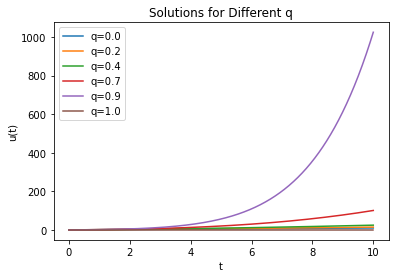

In [30]:
for i, q in enumerate(qs):
    plt.plot(t, solutions[i], label=f'q={q}')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title('Solutions for Different q')
plt.legend()
plt.show()